# 0.0 IMPORTAR BIBLIOTECAS

In [1]:
import math
import numpy as np
import pandas as pd
import inflection
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.display import Image
import datetime


In [2]:
# Ajustar gráficos
plt.rcParams['figure.figsize'] = [25, 12]
plt.rcParams['font.size'] = 24


## 0.1 Funções

## 0.2 Carregar base de dados

In [3]:
df_sales_raw = pd.read_csv( '../datasets/train.csv', low_memory=False )
df_store_raw = pd.read_csv( '../datasets/store.csv', low_memory=False )

# merge entre os dois dataframes
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store' )

# 1.0 DESCRICAO DOS DADOS

In [4]:
df1 = df_raw.copy()

In [5]:
# Renomear as colunas para mdoelo snakecase

cols_old = df1.columns
snakecase = lambda x: inflection.underscore( x )
cols_new = list( map( snakecase, cols_old ) )
df1.columns = cols_new

## 1.2. Tamanho dos dados (shape)

In [6]:
df1.shape

(1017209, 18)

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Tipo dos Dados (Dtypes)

In [8]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [9]:
# Tranaformar a coluna Date para formato de data
df1['date'] = pd.to_datetime( df1['date'] )


## 1.4. Checagem de N/As

In [10]:
df1.isna().sum()


store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

Como proceder para a retirada dos NAs ?

- Descartar todas as linhas com NA.
- Usando algoritmos de ML para inserir dados.
- Entendendo o negócio para inserir dados.

## 1.5 Preencher os NA

In [11]:
# competition_distance              
### Para todos os campos NA nesta coluna considerar e inserir o valor de 200.000 (valor máximo escolhido para este df)
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x )

# competition_open_since_month  
### Para todos os campos NA nesta coluna considerar e inserir o valor do mês da venda (Coluna "date").
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'],axis=1)

# competition_open_since_year       
### Para todos os campos NA nesta coluna considerar e inserir o valor do ano da venda (Coluna "date").
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'],axis=1)

# promo2_since_week 
### Para todos os campos NA nesta coluna considerar e inserir o valor da semana da venda (Coluna "date").
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'],axis=1)

# promo2_since_year
### Para todos os campos NA nesta coluna considerar e inserir o valor do ano da venda (Coluna "date").
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'],axis=1)

# promo_interval
month_map = {1: 'Jan',2: 'Fev',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug', 9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
df1['promo_interval'].fillna(0, inplace=True) # substituir todos os NA para 0 (zero)
df1['month_map'] = df1['date'].dt.month.map(month_map) # criar uma nova coluna e inserir o mês da coluna "Date" conforme a variavel "month_map"
df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)


In [12]:
df1.sample(5).T

,838243,252047,394753,313333,238324
store,549,848,426,341,88
day_of_week,1,1,2,5,1
date,2013-06-10 00:00:00,2014-12-15 00:00:00,2014-07-15 00:00:00,2014-10-10 00:00:00,2014-12-29 00:00:00
sales,4333,12614,5932,5712,6482
customers,529,1135,656,826,684
open,1,1,1,1,1
promo,0,1,1,1,0
state_holiday,0,0,0,0,0
school_holiday,0,0,1,1,1
store_type,a,a,a,a,a


In [13]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Tipos de Mudança

In [14]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [15]:
# transformar valores para inteiros
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

## 1.7 Descrição Estatística dos dados

Métricas de tendência central : 

- media 
- mediana

Métricas de dispersão : 

- desvio padrão
- valor minimo
- valor máximo
- faixa(range) 
- skew(inclinação)
- curtose 

In [16]:
numericos = df1.select_dtypes(include=['int64','float64' ])
categoricos = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### 1.7.1. Atributos Numéricos

In [17]:
# Métricas de tendência central 
media = pd.DataFrame ( numericos.apply(np.mean)).T
mediana = pd.DataFrame ( numericos.apply(np.median)).T

In [18]:
# Métricas de dispersão
desvio_padrao = pd.DataFrame ( numericos.apply(np.std)).T
minimo = pd.DataFrame ( numericos.apply(min)).T
maximo = pd.DataFrame ( numericos.apply(max)).T
faixa = pd.DataFrame ( numericos.apply(lambda x: x.max() - x.min())).T
inclinação = pd.DataFrame ( numericos.apply(lambda x: x.skew() )).T
curtose = pd.DataFrame ( numericos.apply(lambda x: x.kurtosis())).T

In [19]:
#Concatenar
metricas = pd.concat([minimo, maximo, faixa, media, mediana, desvio_padrao, inclinação, curtose ]).T.reset_index()
metricas.columns = ['attributes','min','max','range','mean', 'median', 'std', 'skew','kurtosis' ]
metricas

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2. Atributos Categóricos

In [20]:
# Quantos niveis cada variável categorica possui ?
categoricos.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

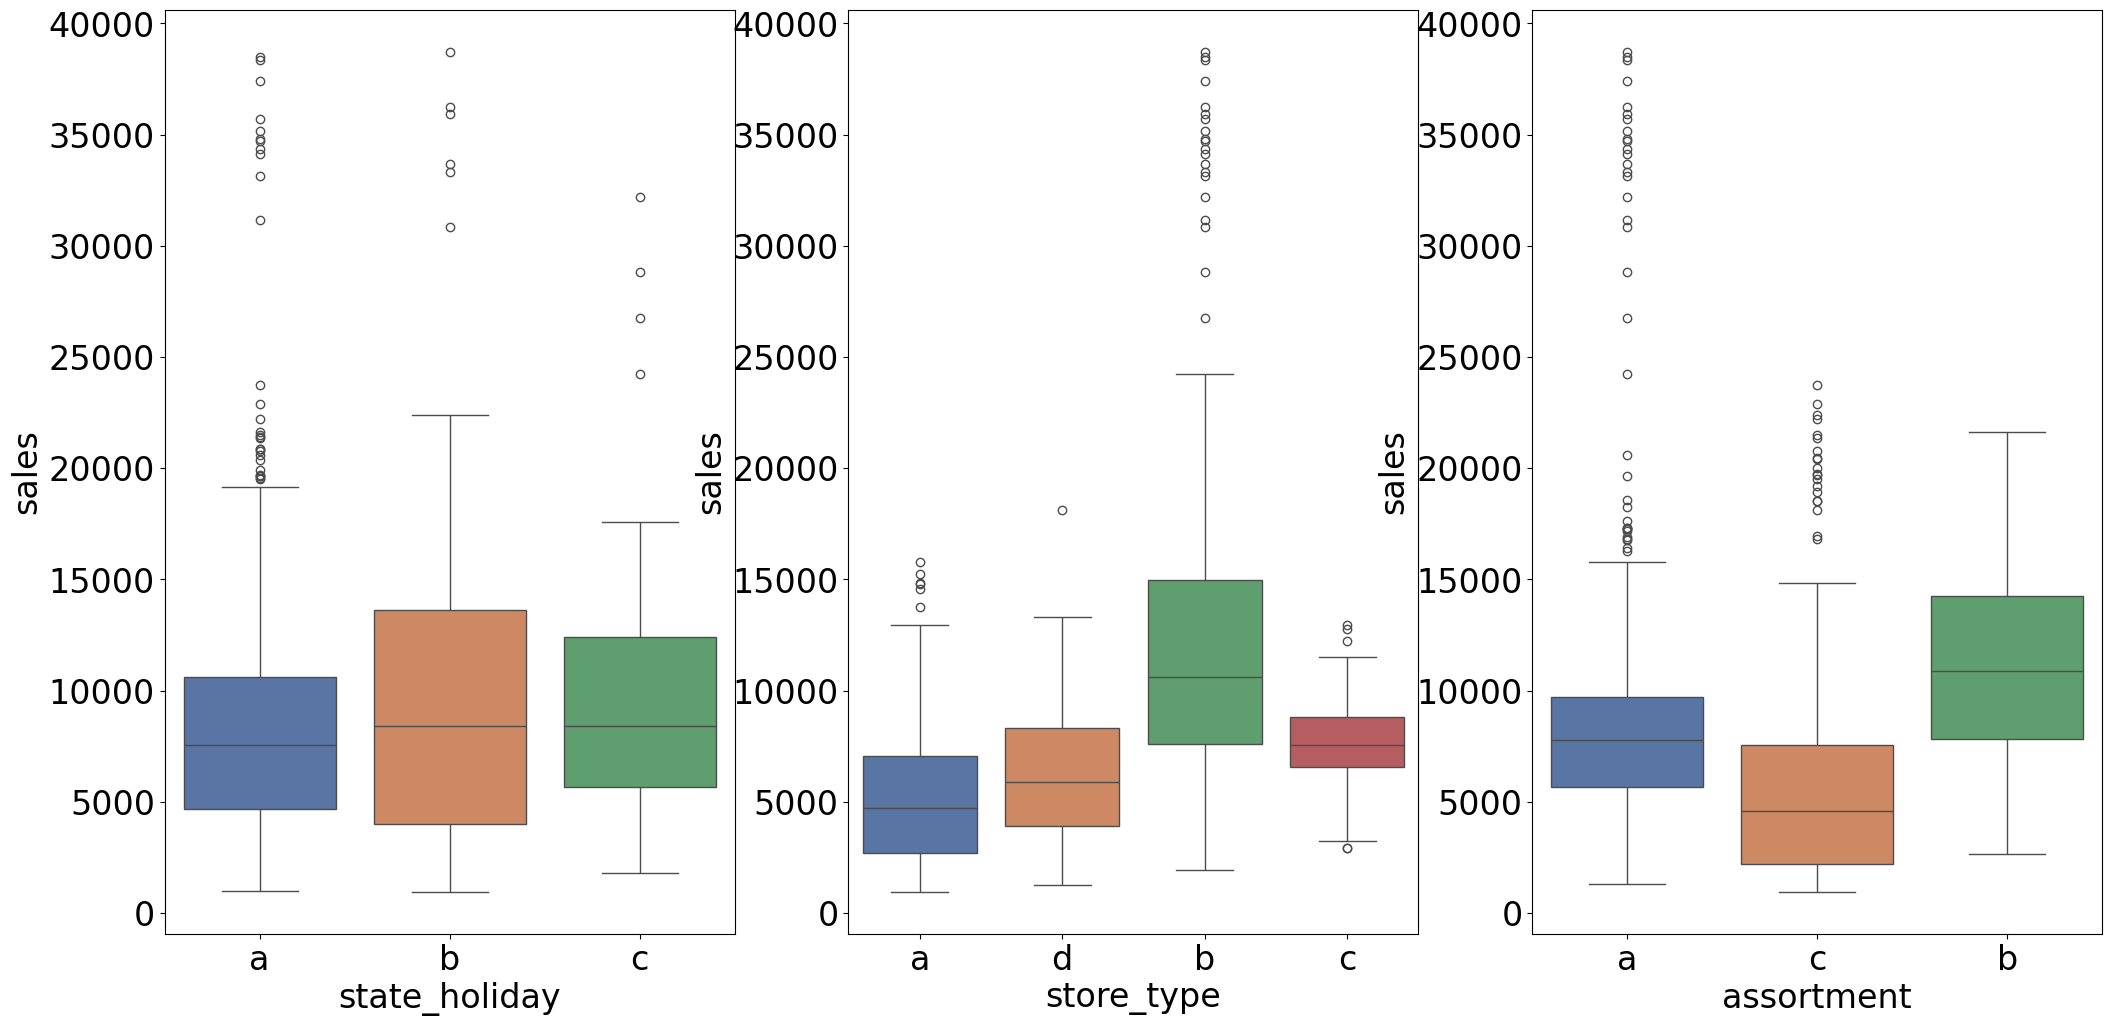

In [21]:
filtro = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=filtro, hue='state_holiday', palette='deep', legend=False)

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=filtro, hue='store_type', palette='deep', legend=False)

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=filtro, hue='assortment', palette='deep', legend=False)

# 2.0 FEATURE ENGINEERING

## 2.1 Mapa mental de hipóteses

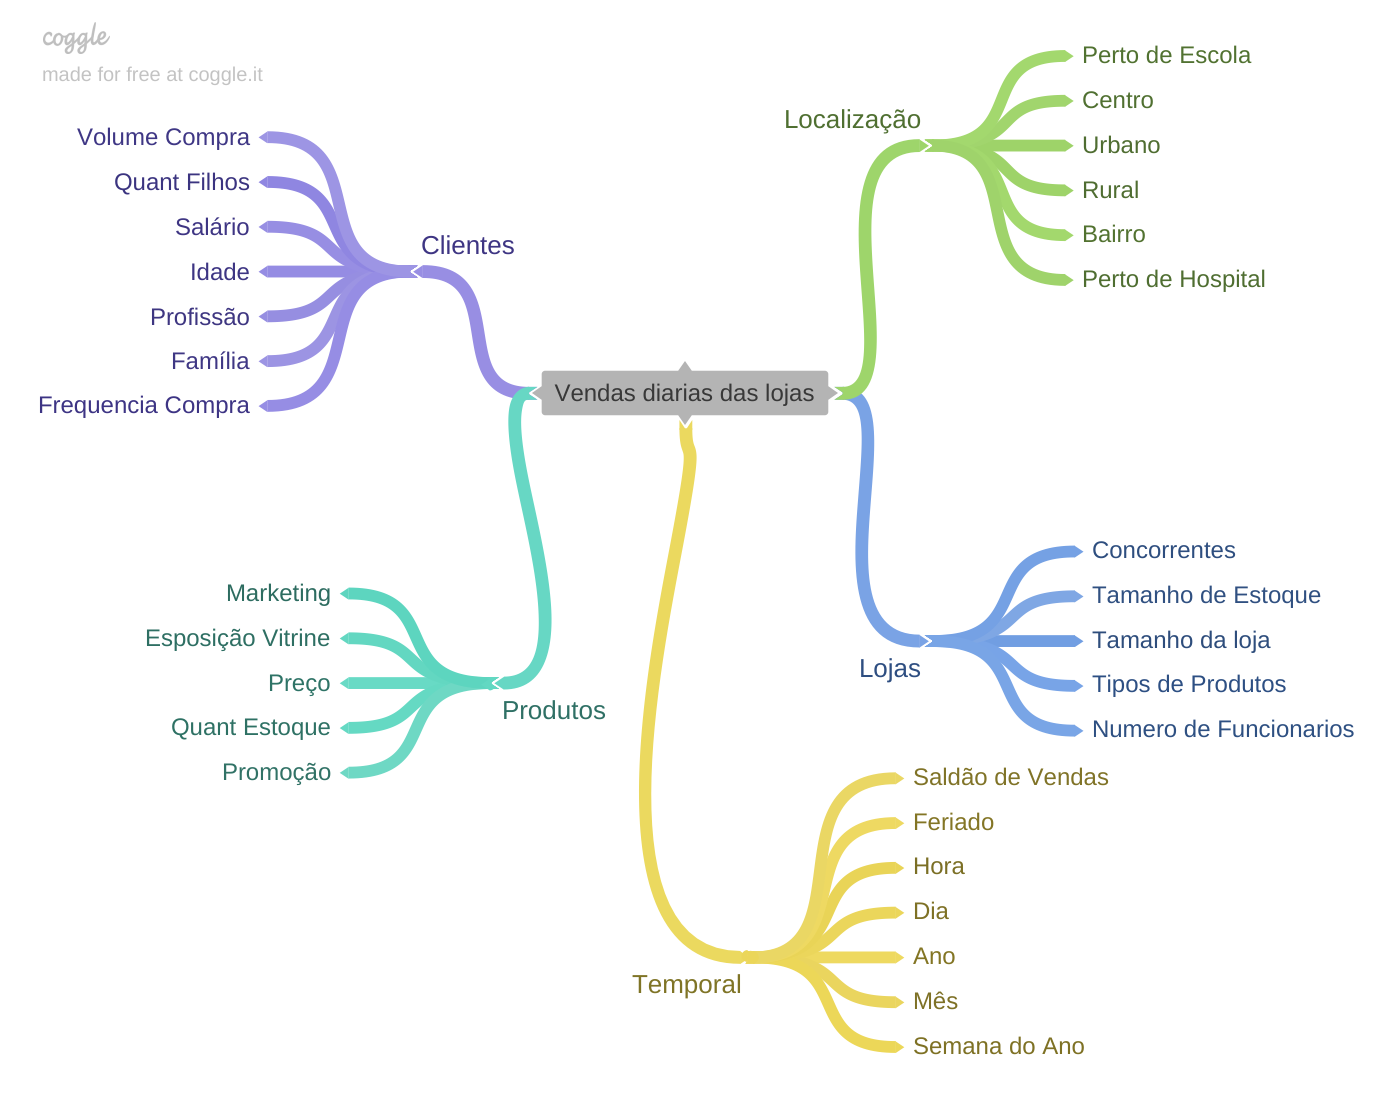

In [22]:
Image('../img/mindmap.png')

## 2.2 Criação das Hipoteses

### 2.2.1 Hipoteses da loja

1. Lojas com número maior de funcionários deveriam vender mais.
2. Lojas com maior capacidade de estoque deveriam vender mais.
3. Lojas com maior porte deveriam vender mais.
4. Lojas com maior sortimentos deveriam vender mais.
5. Lojas com competidores mais próximos deveriam vender menos.
6. Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2 Hipoteses do produto

1. Lojas que investem mais em Marketing deveriam vender mais.
2. Lojas com maior exposição de produto deveriam vender mais.
3. Lojas com produtos com preço menor deveriam vender mais.
5. Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.
6. Lojas com promoções ativas por mais tempo deveriam vender mais.
7. Lojas com mais dias de promoção deveriam vender mais.
8. Lojas com mais promoções consecutivas deveriam vender mais.



### 2.2.3 Hipoteses do tempo

1. Lojas abertas durante o feriado de Natal deveriam vender mais.
2. Lojas deveriam vender mais ao longo dos anos.
3. Lojas deveriam vender mais no segundo semestre do ano.
4. Lojas deveriam vender mais depois do dia 10 de cada mês.
5. Lojas deveriam vender menos aos finais de semana.
6. Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Lista Final das Hipoteses

1. Lojas com maior sortimentos deveriam vender mais.
2. Lojas com competidores mais próximos deveriam vender menos.
3. Lojas com competidores à mais tempo deveriam vendem mais.
4. Lojas com promoções ativas por mais tempo deveriam vender mais.
5. Lojas com mais dias de promoção deveriam vender mais.
7. Lojas com mais promoções consecutivas deveriam vender mais.
8. Lojas abertas durante o feriado de Natal deveriam vender mais.
9. Lojas deveriam vender mais ao longo dos anos.
10. Lojas deveriam vender mais no segundo semestre do ano.
11. Lojas deveriam vender mais depois do dia 10 de cada mês.
12. Lojas deveriam vender menos aos finais de semana.
13. Lojas deveriam vender menos durante os feriados escolares.

## 2.4 Feature Engineering

In [23]:
df2 = df1.copy()

In [24]:
#Ano
df2['year'] = df2['date'].dt.year

#Mês
df2['month'] = df2['date'].dt.month

#Dia
df2['day'] = df2['date'].dt.day

#Dia da Semana
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# Semana no Ano
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# Data em dias de competição
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day= 1), axis=1)
df2['competition_time_month'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)

# Data em dias de promoção
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' +df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )
df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply(lambda x: x.days ).astype( int )

# categorias
df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' )

# feriados
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )


In [25]:
df2.sample(5).T

,205063,572056,709192,170179,300469
store,1019,847,838,700,607
day_of_week,4,2,5,7,5
date,2015-01-29 00:00:00,2014-02-04 00:00:00,2013-10-04 00:00:00,2015-03-01 00:00:00,2014-10-24 00:00:00
sales,10031,8954,7785,0,4911
customers,769,1161,819,0,531
open,1,1,1,0,1
promo,1,1,0,0,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,0,0,0,0,0
store_type,d,c,d,a,a


# 3.0 Filtragem de Variáveis

In [26]:
df3 = df2.copy()

In [27]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das Linhas

In [28]:
# Filltro para considerar a coluna Opem diferentes de zero (lojas abertas) e Sales maior que zero (Vendas)
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Filtragem das Colunas

In [29]:
colunas_para_dropar = ['customers', 'open', 'promo_interval','month_map']
df3 = df3.drop(colunas_para_dropar, axis=1)

In [30]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 EDA - Análise Exploratória de Dados